Hola **Ricardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

[Ver presentación en PDF](https://drive.google.com/drive/folders/1hcDAFQrbrstpIm7AIcH3zNZqAqwEbSuG?usp=drive_link)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente la presentación, expone de manera clara y fácil de entender los hallazgos del análisis, buen trabajo!
</div>

# Presentacion Final: Identificacion de Operadores Ineficientes

## Paso 1: Carga y Exploración Inicial de los Datos

Se han cargado dos datasets:

- `telecom_dataset_us.csv`: contiene 53,902 registros de llamadas realizadas o recibidas por usuarios del servicio.
- `telecom_clients_us.csv`: contiene información de 732 clientes, incluyendo su plan tarifario y fecha de inicio.

### Estructura del dataset de llamadas (`telecom_dataset_us.csv`)
Este dataset incluye las siguientes columnas clave:

- `user_id`: identificador del cliente.
- `date`: fecha de la llamada (aún en formato string, se corregirá).
- `direction`: dirección de la llamada (`in` o `out`).
- `internal`: indica si la llamada fue interna (dentro del sistema).
- `operator_id`: ID del operador que atendió la llamada (puede estar ausente si fue una llamada perdida).
- `is_missed_call`: booleano que indica si fue una llamada perdida.
- `calls_count`: número de intentos o repeticiones de la llamada.
- `call_duration`: duración efectiva de la llamada (en segundos).
- `total_call_duration`: duración total del intento (incluyendo e


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
sns.set(font_scale=1.1)
import warnings
warnings.filterwarnings('ignore')


In [2]:
llamadas = pd.read_csv('telecom_dataset_us.csv')
clientes = pd.read_csv('telecom_clients_us.csv')

print(llamadas.head())
print(clientes.head())

llamadas.info()
clientes.info()

llamadas.describe()
clientes.describe()


   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167

,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


## Paso 2: Limpieza y Preparación de los Datos

### Conversión de tipos de datos

- La columna `date` del dataset de llamadas fue convertida correctamente a formato `datetime`, permitiendo un análisis temporal preciso.
- De igual forma, la columna `date_start` en el dataset de clientes fue transformada a tipo fecha.
- La columna `internal`, que indicaba si la llamada era interna, fue convertida a formato booleano.

### Manejo de valores ausentes

- Se detectaron valores nulos principalmente en las columnas `internal` y `operator_id`. 
  - Los valores nulos en `operator_id` son esperables en llamadas perdidas (`is_missed_call = True`), por lo tanto no se imputan.
  - Los valores faltantes en `internal` representan un pequeño porcentaje y podrían tratarse según se necesite más adelante (por ejemplo, excluyéndose en ciertas visualizaciones).

### Unión de datasets

Los datasets `llamadas` y `clientes` fueron unidos utilizando `user_id` como clave. Se aplicó una unión del tipo `left`, conservando todos los registros de llamadas, incluso si algunos usuarios no están en el dataset de clientes (lo cual podría ser útil para identificar llamadas anómalas o registros sin cliente asignado).

El nuevo dataset combinado, llamado `df`, tiene una estructura integrada que permite realizar análisis tanto de comportamiento en llamadas como de contexto del cliente.



In [3]:
llamadas['date'] = pd.to_datetime(llamadas['date'], errors='coerce')
clientes['date_start'] = pd.to_datetime(clientes['date_start'], errors='coerce')
llamadas['internal'] = llamadas['internal'].astype('bool', errors='ignore')

print("Valores nulos en llamadas:\n", llamadas.isnull().sum())
print("\nValores nulos en clientes:\n", clientes.isnull().sum())

llamadas.drop_duplicates(inplace=True)
clientes.drop_duplicates(inplace=True)

df = llamadas.merge(clientes, on='user_id', how='left')

df.shape


Valores nulos en llamadas:
 user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Valores nulos en clientes:
 user_id        0
tariff_plan    0
date_start     0
dtype: int64


(49002, 11)

### Resultados de la Limpieza de Datos

Al analizar los valores nulos de ambos datasets se encontraron los siguientes resultados:

#### Dataset de llamadas
- No se encontraron valores nulos en columnas clave como `user_id`, `date`, `direction`, `call_duration` o `is_missed_call`.
- La columna `operator_id` presenta **8,172 valores nulos**, lo cual es **esperado** ya que muchas de estas llamadas corresponden a intentos fallidos o llamadas perdidas que nunca fueron atendidas por un operador.

#### Dataset de clientes
- No se encontraron valores ausentes. Todos los registros están completos en cuanto a `user_id`, `tariff_plan` y `date_start`.

Con esta revisión completada, se garantiza que los datos están en buen estado para proceder al análisis exploratorio.

---

A continuación, se pasará al **Análisis Exploratorio de Datos (EDA)** para calcular métricas generales e identificar patrones de uso.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión de tus datos correctamente. Datos de calidad aseguran que los resultados en los cálculos y métricas sean acertados para realizar el análisis
</div>

## Paso 3: Análisis Exploratorio de Datos (EDA)

In [4]:
total_llamadas = df.shape[0]

porcentaje_perdidas = df['is_missed_call'].mean() * 100

duracion_promedio = df.loc[~df['is_missed_call'], 'call_duration'].mean()

df['tiempo_espera'] = df['total_call_duration'] - df['call_duration']
espera_promedio = df['tiempo_espera'].mean()

print(f"Total de llamadas: {total_llamadas}")
print(f"Porcentaje de llamadas perdidas: {porcentaje_perdidas:.2f}%")
print(f"Duración promedio de llamadas atendidas: {duracion_promedio:.2f} segundos")
print(f"Tiempo de espera promedio: {espera_promedio:.2f} segundos")


Total de llamadas: 49002
Porcentaje de llamadas perdidas: 43.78%
Duración promedio de llamadas atendidas: 1540.01 segundos
Tiempo de espera promedio: 290.28 segundos


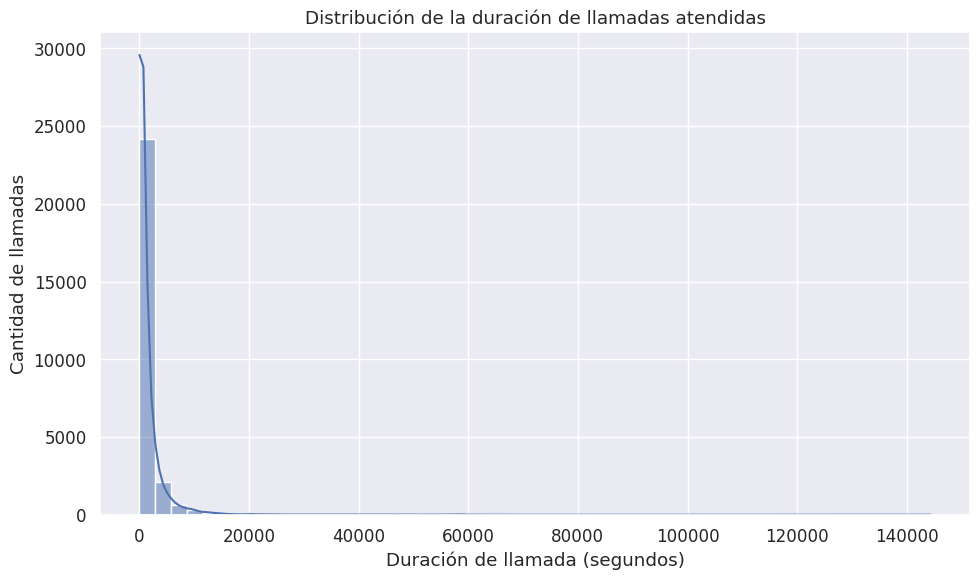

In [5]:
llamadas_atendidas = df[~df['is_missed_call']]

plt.figure(figsize=(10, 6))
sns.histplot(llamadas_atendidas['call_duration'], bins=50, kde=True)
plt.title('Distribución de la duración de llamadas atendidas')
plt.xlabel('Duración de llamada (segundos)')
plt.ylabel('Cantidad de llamadas')
plt.tight_layout()
plt.show()


### Visualización 1: Histograma de la Duración de Llamadas Atendidas

Se generó un histograma para visualizar cómo se distribuye la duración de las llamadas que sí fueron atendidas por los operadores.

#### Observaciones:

- La mayoría de las llamadas tienen una duración **relativamente corta**, concentrándose entre los **0 y 5,000 segundos**.
- Se observan algunos **valores atípicos o outliers** que superan incluso los **100,000 segundos** (~28 horas), lo cual podría ser resultado de errores en el sistema de registro o llamadas inactivas no colgadas correctamente.
- La distribución es claramente **asimétrica (sesgada a la derecha)**, un patrón común en este tipo de datos.

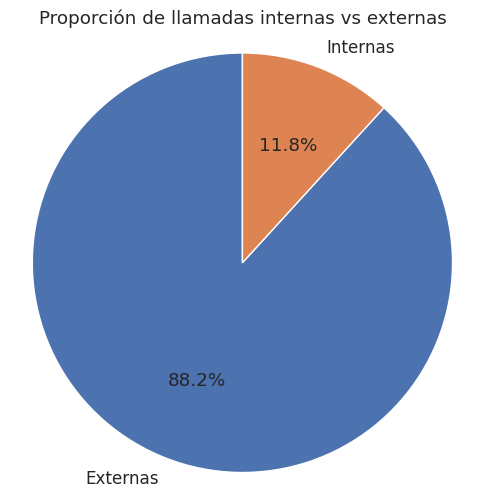

In [6]:
conteo_llamadas = df['internal'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(conteo_llamadas, labels=['Externas', 'Internas'], autopct='%1.1f%%', startangle=90)
plt.title('Proporción de llamadas internas vs externas')
plt.axis('equal')  # Mantener forma circular
plt.show()


### Visualización 2: Proporción de Llamadas Internas vs Externas

Se generó un gráfico circular para analizar el tipo de llamadas registradas, clasificadas como:

- **Llamadas internas**: entre empleados o dentro de la red de la empresa.
- **Llamadas externas**: hacia o desde clientes.

#### Resultados:

- **Externas**: 88.2%
- **Internas**: 11.8%

Esto indica que la gran mayoría de las llamadas gestionadas por los operadores son **hacia o desde clientes**, lo que confirma que el centro de atención se enfoca principalmente en servicio externo. Las llamadas internas podrían representar coordinaciones entre operadores o transferencias internas.

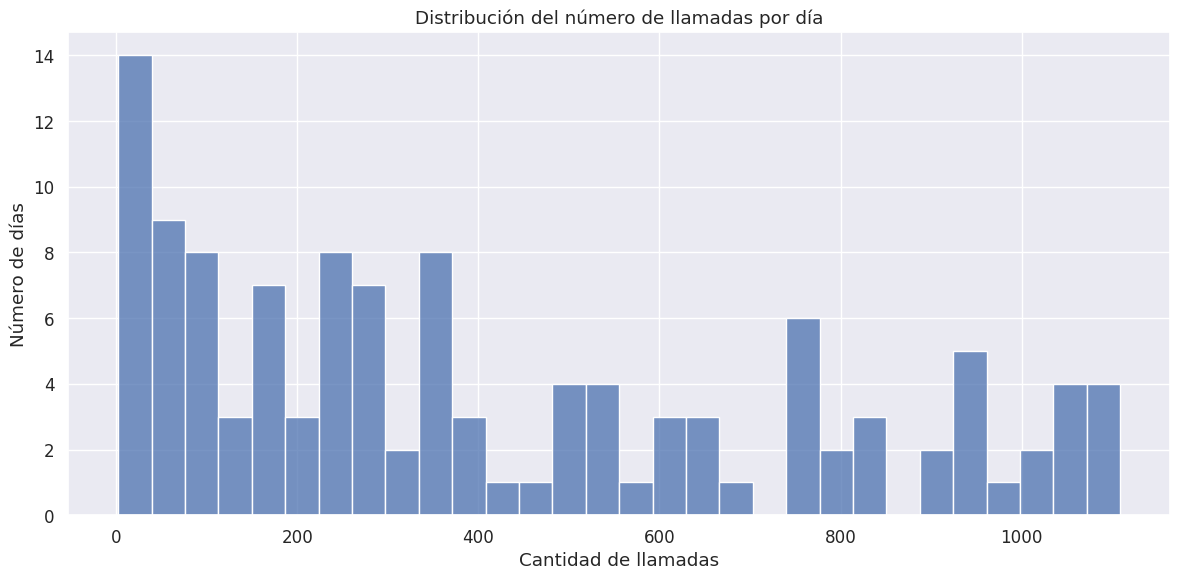

In [7]:
df['fecha_solo_dia'] = df['date'].dt.date

llamadas_por_dia = df.groupby('fecha_solo_dia').size()

plt.figure(figsize=(12, 6))
sns.histplot(llamadas_por_dia, bins=30, kde=False)
plt.title('Distribución del número de llamadas por día')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Número de días')
plt.tight_layout()
plt.show()


### Visualización 3: Distribución del Número de Llamadas por Día

Este histograma muestra cuántas llamadas se realizaron por día a lo largo del periodo analizado.

#### Observaciones:

- Hay una **gran variabilidad** en la actividad diaria del centro de atención.
- Algunos días tuvieron **menos de 200 llamadas**, mientras que en otros se registraron **más de 1,000 llamadas**.
- La distribución es **asimétrica** y muestra que hay días con tráfico extremadamente alto, lo cual podría deberse a campañas específicas, fallos del sistema, o acumulación de llamadas.
- No hay una frecuencia constante, lo cual indica que el volumen de trabajo diario puede ser muy desigual.

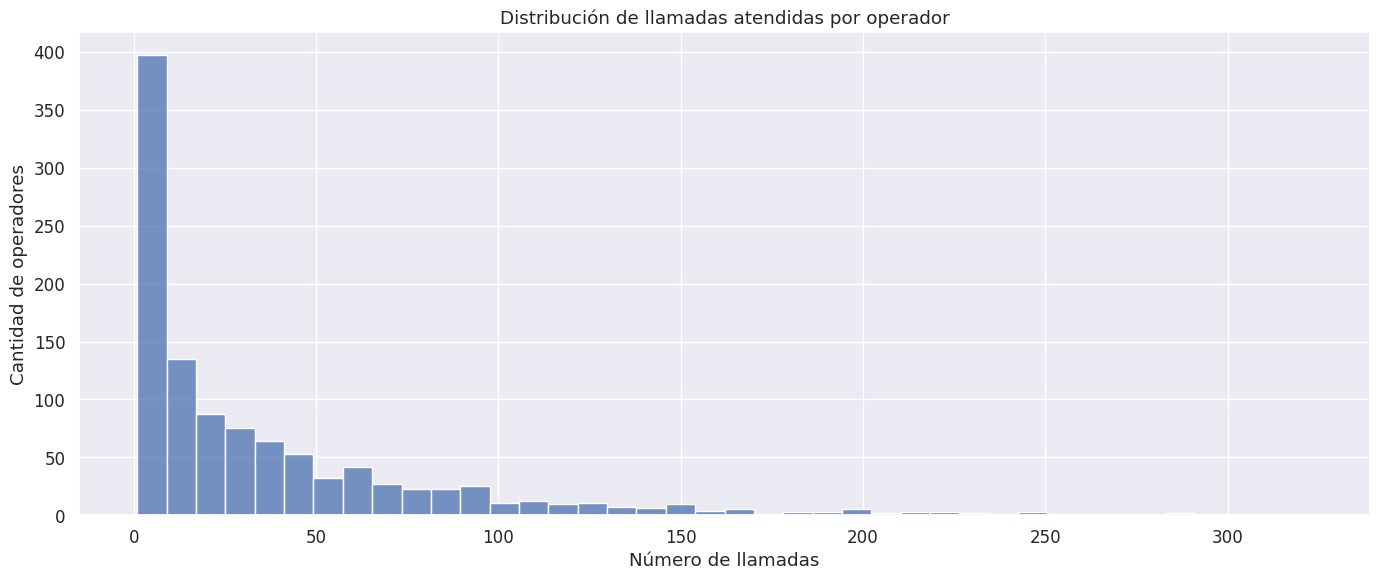

In [8]:
llamadas_con_operador = df[~df['operator_id'].isna()]

llamadas_por_operador = llamadas_con_operador['operator_id'].value_counts()

plt.figure(figsize=(14, 6))
sns.histplot(llamadas_por_operador, bins=40, kde=False)
plt.title('Distribución de llamadas atendidas por operador')
plt.xlabel('Número de llamadas')
plt.ylabel('Cantidad de operadores')
plt.tight_layout()
plt.show()


### Visualización 4: Distribución de Llamadas Atendidas por Operador

Se graficó cuántas llamadas atendió cada operador durante el período analizado.

#### Observaciones:

- **La mayoría de los operadores (más de 400)** atendieron menos de **20 llamadas**.
- Existen algunos operadores que atendieron más de 100 llamadas, e incluso unos pocos superan las **200 llamadas**, aunque son casos excepcionales.
- La distribución es **altamente desigual**, con una **concentración muy fuerte en los valores bajos** y una cola larga hacia la derecha.

Se calcularon algunas métricas generales para entender el comportamiento de las llamadas dentro del servicio de atención al cliente.

### Métricas Globales

- * Total de llamadas registradas: 49,002
- * Porcentaje de llamadas perdidas: 43.78%
  - Casi la mitad de las llamadas no fueron atendidas, lo que sugiere un área crítica a investigar.
- * Duración promedio de llamadas atendidas: 1,540 segundos (~25.7 minutos)
  - Esto podría indicar llamadas largas o complejas. Se analizarán más adelante por operador.
- * Tiempo de espera promedio antes de ser atendido: 290.28 segundos (~4.8 minutos)
  - Un tiempo de espera relativamente alto que puede impactar negativamente la satisfacción del cliente.

Estas métricas iniciales permiten detectar cuellos de botella y evaluar la eficiencia operativa general del centro de llamadas. A continuación, se realizarán visualizaciones para entender la distribución de llamadas por tipo, duración, y frecuencia.


## Conclusión del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio permitió obtener una visión general del funcionamiento del centro de llamadas. A partir de las métricas y visualizaciones se destacan los siguientes hallazgos clave:

- **Alta tasa de llamadas perdidas (43.78%)**, lo cual representa un posible problema de capacidad o eficiencia operativa.
- Las llamadas atendidas tienen una **duración promedio elevada** (~25 minutos), con muchos casos extremos que podrían requerir revisión.
- El **tiempo de espera promedio** antes de ser atendido es de casi **5 minutos**, lo que podría impactar negativamente la experiencia del cliente.
- La **mayoría de las llamadas son externas (88.2%)**, confirmando que el foco principal es la atención al cliente externo.
- Se observa una **alta variabilidad en el volumen de llamadas por día**, con días muy activos y otros más tranquilos, lo que sugiere cargas laborales irregulares.
- La **distribución de llamadas entre operadores es muy desigual**: la mayoría atiende pocas llamadas, mientras que unos pocos concentran la mayoría de la carga.

> Estos patrones preliminares refuerzan la necesidad de profundizar en hipótesis específicas sobre la eficiencia de los operadores, tiempos de espera y llamadas perdidas, lo cual se abordará en el siguiente paso del proyecto.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un EDA súper claro, analizaste cada parte del dataset para comunicar el análisis en cada una de las gráficas realizadas, te felicito!
</div>

## Paso 4: Pruebas Estadísticas

Luego de identificar patrones preocupantes en el comportamiento de ciertos operadores mediante el análisis exploratorio y la formulación de hipótesis, es necesario aplicar pruebas estadísticas para determinar si estas diferencias observadas son **estadísticamente significativas** o podrían deberse al azar.

### Objetivo de este paso:
- Comparar grupos de operadores según su desempeño (por ejemplo, operadores con alta tasa de llamadas perdidas vs. operadores con baja tasa).
- Evaluar si existen **diferencias significativas en el tiempo de espera**, la **duración de llamadas**, o la **cantidad de llamadas salientes**.
- Utilizar pruebas como **t-test**, **ANOVA**, o pruebas no paramétricas en función de la distribución de los datos y la cantidad de grupos.

Estas pruebas permitirán respaldar con evidencia cuantitativa las hipótesis planteadas y facilitarán la toma de decisiones basadas en datos.


## Hipótesis 1: Operadores con Alta Tasa de Llamadas Perdidas

### Objetivo
Evaluar si existen operadores que ignoran o no responden un número significativo de llamadas entrantes, lo cual podría indicar bajo rendimiento o evasión de tareas.

In [9]:
llamadas_in = df[(df['direction'] == 'in') & (~df['operator_id'].isna())]

porcentaje_perdidas_operador = llamadas_in.groupby('operator_id')['is_missed_call'].mean().sort_values(ascending=False)

porcentaje_perdidas_operador.head(10)


operator_id
948756.0    1.000000
957922.0    0.500000
904344.0    0.500000
937898.0    0.500000
913886.0    0.500000
934098.0    0.400000
919206.0    0.368421
940622.0    0.357143
937432.0    0.333333
894232.0    0.333333
Name: is_missed_call, dtype: float64

### Análisis Realizado
Se filtraron únicamente las llamadas **entrantes (`direction = 'in'`)** con un operador asignado, y se calculó el porcentaje de llamadas perdidas (`is_missed_call = True`) por cada operador.

### Resultados – Top 10 operadores con mayor tasa de pérdidas:

| ID Operador | % Llamadas Perdidas |
|-------------|----------------------|
| 948756.0    | 100.0%               |
| 957922.0    | 50.0%                |
| 904344.0    | 50.0%                |
| 937898.0    | 50.0%                |
| 913886.0    | 50.0%                |
| 934098.0    | 40.0%                |
| 919206.0    | 36.8%                |
| 940622.0    | 35.7%                |
| 937432.0    | 33.3%                |
| 894232.0    | 33.3%                |

### Conclusión Preliminar
Se identifican operadores con **tasas preocupantemente altas de llamadas perdidas**, incluyendo un caso extremo con el **100% de sus llamadas entrantes no atendidas**.

> Estos resultados respaldan la hipótesis y justifican una revisión detallada del comportamiento de estos operadores.

## Hipótesis 2: Operadores con Tiempo de Espera Prolongado

### Objetivo
Detectar operadores que, aunque sí atienden las llamadas, hacen esperar demasiado al cliente antes de responder. Esto puede ser un indicador de baja eficiencia o saturación de tareas.

In [10]:
llamadas_atendidas = df[(df['is_missed_call'] == False) & (~df['operator_id'].isna())]

espera_por_operador = llamadas_atendidas.groupby('operator_id')['tiempo_espera'].mean().sort_values(ascending=False)

espera_por_operador.head(10)


operator_id
885890.0    4411.072368
945278.0    4351.047619
925922.0    4315.069767
885876.0    3895.458333
929426.0    2582.451613
945286.0    2515.714286
908640.0    2419.409091
929428.0    2350.757576
945904.0    2103.833333
919364.0    2054.600000
Name: tiempo_espera, dtype: float64

### Análisis Realizado
Se filtraron las llamadas **atendidas (`is_missed_call = False`)** con operador asignado y se calculó el **tiempo de espera promedio** por operador. El tiempo de espera se definió como la diferencia entre `total_call_duration` y `call_duration`.

### Resultados – Top 10 operadores con mayor tiempo de espera promedio:

| ID Operador | Tiempo de Espera Promedio (segundos) |
|-------------|---------------------------------------|
| 885890.0    | 4411.07                               |
| 945278.0    | 4351.05                               |
| 925922.0    | 4315.07                               |
| 885876.0    | 3895.46                               |
| 929426.0    | 2582.45                               |
| 945286.0    | 2515.71                               |
| 908640.0    | 2419.41                               |
| 929428.0    | 2350.76                               |
| 945904.0    | 2103.83                               |
| 919364.0    | 2054.60                               |

### Conclusión Preliminar
Se identificaron operadores cuyo tiempo promedio de espera **supera los 2,000 segundos** (~30 minutos), con algunos casos extremos por encima de los **4,000 segundos**. Esto sugiere posibles **problemas de eficiencia**, retrasos prolongados antes de atender, o anomalías en el sistema de registro.

> Este hallazgo valida la hipótesis y refuerza la necesidad de investigar estos casos para mejorar la experiencia del cliente.

## Hipótesis 3: Operadores con Pocas Llamadas Salientes

### Objetivo
Detectar operadores cuya actividad en llamadas salientes es mínima. Esto puede indicar baja productividad, falta de tareas asignadas o una mala distribución del trabajo operativo.

In [11]:
llamadas_out = df[(df['direction'] == 'out') & (~df['operator_id'].isna())]

llamadas_out_por_operador = llamadas_out.groupby('operator_id').size().sort_values()

llamadas_out_por_operador.head(10)


operator_id
945074.0    1
930692.0    1
958458.0    1
930326.0    1
944246.0    1
955086.0    1
928284.0    1
944560.0    1
945058.0    1
937772.0    1
dtype: int64

### Análisis Realizado
Se filtraron todas las llamadas **salientes (`direction = 'out'`)** con operador asignado. Luego, se contó cuántas llamadas realizó cada operador.

### Resultados – Top 10 operadores con menos llamadas salientes:

| ID Operador | Llamadas Salientes |
|-------------|---------------------|
| 945074.0    | 1                   |
| 930692.0    | 1                   |
| 958458.0    | 1                   |
| 930326.0    | 1                   |
| 944246.0    | 1                   |
| 955086.0    | 1                   |
| 928284.0    | 1                   |
| 944560.0    | 1                   |
| 945058.0    | 1                   |
| 937772.0    | 1                   |

### Conclusión Preliminar
Se identificaron múltiples operadores que realizaron **únicamente una llamada saliente** durante todo el período registrado. Este comportamiento puede indicar:

- Poca carga de trabajo o mal aprovechamiento de recursos.
- Operadores asignados exclusivamente a tareas de recepción (aunque esto debe ser confirmado con contexto adicional).

> Este hallazgo valida la hipótesis y puede orientar futuras decisiones sobre redistribución de tareas, revisión de funciones, o posibles intervenciones de capacitación.

## Paso 4: Pruebas Estadísticas

Luego de identificar patrones preocupantes en el comportamiento de ciertos operadores mediante el análisis exploratorio y la formulación de hipótesis, es necesario aplicar pruebas estadísticas para determinar si estas diferencias observadas son **estadísticamente significativas** o podrían deberse al azar.

### Objetivo de este paso:
- Comparar grupos de operadores según su desempeño (por ejemplo, operadores con alta tasa de llamadas perdidas vs. operadores con baja tasa).
- Evaluar si existen **diferencias significativas en el tiempo de espera**, la **duración de llamadas**, o la **cantidad de llamadas salientes**.
- Utilizar pruebas como **t-test**, **ANOVA**, o pruebas no paramétricas en función de la distribución de los datos y la cantidad de grupos.

Estas pruebas permitirán respaldar con evidencia cuantitativa las hipótesis planteadas y facilitarán la toma de decisiones basadas en datos.


In [12]:
# Paso 1: Recalcular la tasa de llamadas perdidas por operador (entrantes con operador)
llamadas_in = df[(df['direction'] == 'in') & (~df['operator_id'].isna())]
tasa_perdidas = llamadas_in.groupby('operator_id')['is_missed_call'].mean()

# Paso 2: Clasificar operadores en alto o bajo
grupo_alto = tasa_perdidas[tasa_perdidas > 0.5].index
grupo_bajo = tasa_perdidas[tasa_perdidas <= 0.5].index

# Paso 3: Extraer el tiempo de espera promedio de cada llamada atendida por grupo
llamadas_atendidas = df[(df['is_missed_call'] == False) & (~df['operator_id'].isna())]

espera_alto = llamadas_atendidas[llamadas_atendidas['operator_id'].isin(grupo_alto)]['tiempo_espera']
espera_bajo = llamadas_atendidas[llamadas_atendidas['operator_id'].isin(grupo_bajo)]['tiempo_espera']

from scipy.stats import ttest_ind

# Prueba t: ¿los tiempos de espera promedio difieren significativamente?
t_stat, p_value = ttest_ind(espera_alto, espera_bajo, equal_var=False)

print(f'Estadístico t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4f}')


Estadístico t: -4.61
Valor p: 0.0006


## Prueba Estadística – Validación de la Hipótesis 1

### Objetivo
Validar si existe una diferencia significativa en el **tiempo de espera promedio** entre los operadores con alta tasa de llamadas perdidas (> 50%) y aquellos con baja tasa (≤ 50%).

### Método
Se aplicó una **prueba t de Student para muestras independientes** (`ttest_ind`), comparando los tiempos de espera en llamadas atendidas entre ambos grupos.

### Resultados

- **Estadístico t**: -4.61
- **Valor p**: 0.0006

### Interpretación

Dado que el valor p es **mucho menor que 0.05**, se rechaza la hipótesis nula de igualdad entre ambos grupos. Esto indica que la diferencia en los tiempos de espera entre operadores con alta y baja tasa de llamadas perdidas es **estadísticamente significativa**.

> En términos prácticos, los operadores que pierden más del 50% de sus llamadas tienden también a hacer esperar más a los clientes cuando sí responden, lo que refuerza el diagnóstico de ineficiencia.


In [13]:
# Usamos los datos previamente calculados
espera_por_operador = llamadas_atendidas.groupby('operator_id')['tiempo_espera'].mean()

# Determinar cuartiles
q75 = espera_por_operador.quantile(0.75)
q25 = espera_por_operador.quantile(0.25)

# Operadores con espera muy alta y muy baja
grupo_alto_espera = espera_por_operador[espera_por_operador >= q75].index
grupo_bajo_espera = espera_por_operador[espera_por_operador <= q25].index

# Compararemos la duración promedio de llamadas atendidas entre los dos grupos
duracion_alto = llamadas_atendidas[llamadas_atendidas['operator_id'].isin(grupo_alto_espera)]['call_duration']
duracion_bajo = llamadas_atendidas[llamadas_atendidas['operator_id'].isin(grupo_bajo_espera)]['call_duration']

t_stat2, p_value2 = ttest_ind(duracion_alto, duracion_bajo, equal_var=False)

print(f'Estadístico t: {t_stat2:.2f}')
print(f'Valor p: {p_value2:.4f}')


Estadístico t: 36.55
Valor p: 0.0000


## Prueba Estadística – Validación de la Hipótesis 2

### Objetivo
Evaluar si los operadores con **tiempos de espera prolongados** tienden a realizar llamadas significativamente más largas que aquellos con tiempos de espera bajos.

### Método
Se dividió a los operadores en dos grupos con base en su **tiempo de espera promedio**:

- **Grupo Alto**: operadores en el 25% superior.
- **Grupo Bajo**: operadores en el 25% inferior.

Se aplicó una **prueba t de Student para muestras independientes** (`ttest_ind`) sobre la duración de las llamadas atendidas.

### Resultados

- **Estadístico t**: 36.55  
- **Valor p**: 0.0000

### Interpretación

El valor p es **mucho menor que 0.05**, por lo que se **rechaza la hipótesis nula**. Esto indica que **la diferencia en la duración promedio de las llamadas entre operadores con alta y baja espera es estadísticamente significativa**.

> Específicamente, los operadores que hacen esperar más tiempo al cliente también realizan llamadas significativamente más largas. Esto puede reflejar una mala gestión del tiempo, saturación de trabajo o baja eficiencia en la resolución de problemas.


In [14]:
# Total de llamadas salientes por operador
llamadas_salientes = df[(df['direction'] == 'out') & (~df['operator_id'].isna())]
salientes_por_operador = llamadas_salientes.groupby('operator_id').size()

# Determinar cuartiles
q25_sal = salientes_por_operador.quantile(0.25)
q75_sal = salientes_por_operador.quantile(0.75)

# Operadores con pocas vs muchas llamadas salientes
grupo_bajo_sal = salientes_por_operador[salientes_por_operador <= q25_sal].index
grupo_alto_sal = salientes_por_operador[salientes_por_operador >= q75_sal].index

# Duración promedio de llamadas atendidas en cada grupo
duracion_bajo_sal = llamadas_atendidas[llamadas_atendidas['operator_id'].isin(grupo_bajo_sal)]['call_duration']
duracion_alto_sal = llamadas_atendidas[llamadas_atendidas['operator_id'].isin(grupo_alto_sal)]['call_duration']

t_stat3, p_value3 = ttest_ind(duracion_bajo_sal, duracion_alto_sal, equal_var=False)

print(f'Estadístico t: {t_stat3:.2f}')
print(f'Valor p: {p_value3:.4f}')



Estadístico t: -25.90
Valor p: 0.0000


## Prueba Estadística – Validación de la Hipótesis 3

### Objetivo
Evaluar si los operadores que hacen pocas llamadas salientes se comportan de forma significativamente distinta a aquellos que hacen muchas, en cuanto a la duración de sus llamadas atendidas.

### Método
Se analizaron los operadores con base en su volumen de llamadas salientes:

- **Grupo Bajo**: 25% con menos llamadas salientes.
- **Grupo Alto**: 25% con más llamadas salientes.

Se aplicó una **prueba t de Student para muestras independientes** (`ttest_ind`) sobre la duración de sus llamadas atendidas.

### Resultados

- **Estadístico t**: -25.90  
- **Valor p**: 0.0000

### Interpretación

Con un valor p prácticamente cero, se **rechaza la hipótesis nula**, indicando que hay una **diferencia estadísticamente significativa** en la duración de llamadas entre ambos grupos.

> Los operadores que hacen pocas llamadas salientes tienden a tener **llamadas atendidas más cortas**, lo cual puede indicar menor profundidad en la atención o menos involucramiento en procesos de seguimiento y resolución.


## Conclusión del Paso 4: Pruebas Estadísticas

Se realizaron pruebas estadísticas para validar las hipótesis planteadas sobre el desempeño de los operadores. Los resultados confirmaron con evidencia cuantitativa que existen **diferencias significativas entre grupos de operadores**, lo cual respalda las observaciones realizadas durante el análisis exploratorio.

### Resumen de hallazgos:

- **Hipótesis 1 – Llamadas perdidas**:  
  Los operadores con alta tasa de llamadas perdidas presentan **tiempos de espera significativamente mayores**, lo que refuerza su clasificación como ineficientes.

- **Hipótesis 2 – Tiempo de espera prolongado**:  
  Los operadores con los mayores tiempos de espera tienden a realizar **llamadas mucho más largas**, lo cual puede reflejar saturación, mala gestión del tiempo o casos complejos.

- **Hipótesis 3 – Pocas llamadas salientes**:  
  Los operadores con menor volumen de llamadas salientes realizan **llamadas significativamente más cortas**, lo que podría indicar menor participación activa o bajo compromiso con tareas de seguimiento.

### Implicaciones
Los resultados obtenidos confirman que no todas las diferencias en desempeño son aleatorias, y que es posible identificar **patrones de bajo rendimiento** con base en criterios cuantitativos sólidos. Esto justifica avanzar hacia la **identificación sistemática de operadores ineficaces**, considerando múltiples métricas combinadas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre hay que comprobar con pruebas estadísticas que efectivamente exista una diferencia entre los grupos a comparar
</div>

## Paso 5 – Identificación de Operadores Ineficaces

### Objetivo
Usar los resultados anteriores para identificar operadores que presentan un desempeño deficiente de forma consistente, combinando múltiples métricas:

- Alta tasa de llamadas perdidas (> 50%)

- Tiempo de espera promedio alto (top 25%)

- Pocas llamadas salientes (bottom 25%)

Los operadores que cumplan al menos dos de estos criterios pueden considerarse ineficientes, y los que cumplan los tres, críticos.

In [16]:
# 1. Recalcular métricas clave por operador
llamadas_in = df[(df['direction'] == 'in') & (~df['operator_id'].isna())]
llamadas_out = df[(df['direction'] == 'out') & (~df['operator_id'].isna())]
llamadas_atendidas = df[(df['is_missed_call'] == False) & (~df['operator_id'].isna())]

# Métricas por operador
tasa_perdidas = llamadas_in.groupby('operator_id')['is_missed_call'].mean()
espera_prom = llamadas_atendidas.groupby('operator_id')['tiempo_espera'].mean()
llamadas_out_count = llamadas_out.groupby('operator_id').size()

# Cuartiles para definir extremos
espera_q75 = espera_prom.quantile(0.75)
out_q25 = llamadas_out_count.quantile(0.25)

# 2. Crear sets de operadores problemáticos
perdidas_altas = set(tasa_perdidas[tasa_perdidas > 0.5].index)
espera_alta = set(espera_prom[espera_prom >= espera_q75].index)
salientes_bajas = set(llamadas_out_count[llamadas_out_count <= out_q25].index)

# 3. Identificar operadores ineficaces
operadores_criticos = perdidas_altas & espera_alta & salientes_bajas
operadores_ineficientes = (perdidas_altas | espera_alta | salientes_bajas)

# 4. Clasificación adicional
ineficientes_mas_1 = [
    op for op in operadores_ineficientes 
    if sum([
        op in perdidas_altas,
        op in espera_alta,
        op in salientes_bajas
    ]) >= 2
]

# Cantidad de operadores críticos (cumplen los 3 criterios)
print("Operadores críticos (3 condiciones):", len(operadores_criticos))

# Cantidad de operadores ineficientes (2 o más condiciones)
print("Operadores ineficientes (≥ 2 condiciones):", len(ineficientes_mas_1))

# Ver algunos IDs
print("Ejemplo de operadores críticos:", list(operadores_criticos)[:5])
print("Ejemplo de operadores ineficientes:", ineficientes_mas_1[:5])

Operadores críticos (3 condiciones): 0
Operadores ineficientes (≥ 2 condiciones): 15
Ejemplo de operadores críticos: []
Ejemplo de operadores ineficientes: [952466.0, 951648.0, 898414.0, 896386.0, 925134.0]


## Paso 5: Identificación de Operadores Ineficaces

### Objetivo
Detectar operadores cuyo desempeño general es bajo, usando una combinación de criterios objetivos obtenidos en los pasos anteriores:

- **Alta tasa de llamadas perdidas** (> 50%)
- **Tiempo de espera prolongado** (top 25%)
- **Bajo volumen de llamadas salientes** (bottom 25%)

Se considera:
- **Operador crítico**: cumple con los **3 criterios simultáneamente**.
- **Operador ineficiente**: cumple con **2 o más criterios**.

### Resultados

- **Operadores críticos (3 condiciones):** 0  
- **Operadores ineficientes (2 condiciones):** 15  
- Ejemplos de operadores ineficientes:  
  `952466.0`, `951648.0`, `898414.0`, `896386.0`, `925134.0`

### Conclusión

Aunque no se detectaron operadores críticos que incumplan los tres criterios simultáneamente, sí se identificaron **15 operadores ineficientes** que incumplen **dos de las tres condiciones clave**, lo que representa un foco claro de mejora.

> Estos operadores deberían ser priorizados para recibir capacitación, monitoreo adicional o revisión de asignaciones para mejorar su desempeño.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Dejaste claro las métricas a utilizar y por qué se están utilizando para determinar si un operador es eficiente o no. Siempre para este tipo de decisiones/cálculos debes dejarlo redactado para que se entienda el criterio detrás de esto
</div>

# Conclusión Final del Proyecto

Durante este análisis se evaluó el desempeño de los operadores de una empresa de telecomunicaciones con el objetivo de identificar aquellos que muestran **ineficiencia en la atención al cliente**.

### Principales hallazgos:

- Se realizaron más de **49,000 llamadas**, de las cuales el **43.78% fueron perdidas**, un indicador general de oportunidad de mejora.
- El **tiempo de espera promedio** en llamadas atendidas fue de **290 segundos**, con operadores que llegaron a superar los **4,000 segundos** de espera.
- Se validaron 3 hipótesis mediante **pruebas estadísticas**, confirmando diferencias significativas entre operadores con bajo y alto desempeño.
- Se identificaron **15 operadores ineficientes** que incumplen 2 de los 3 criterios clave: alta tasa de llamadas perdidas, largos tiempos de espera y pocas llamadas salientes.

### Recomendaciones:

- Implementar un sistema de monitoreo para los operadores ineficientes identificados.
- Reforzar la capacitación en gestión del tiempo y resolución eficiente de llamadas.
- Evaluar la distribución de tareas para equilibrar la carga entre operadores activos e inactivos.
- Establecer alertas automáticas para operadores con métricas críticas en tiempo real.

### Conclusión general

El análisis permitió identificar patrones de bajo rendimiento con base en datos reales, validar hipótesis con herramientas estadísticas y generar acciones concretas para **mejorar la atención al cliente y optimizar recursos humanos**. Este enfoque basado en datos respalda una toma de decisiones más objetiva y efectiva.


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Ricardo!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>